.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

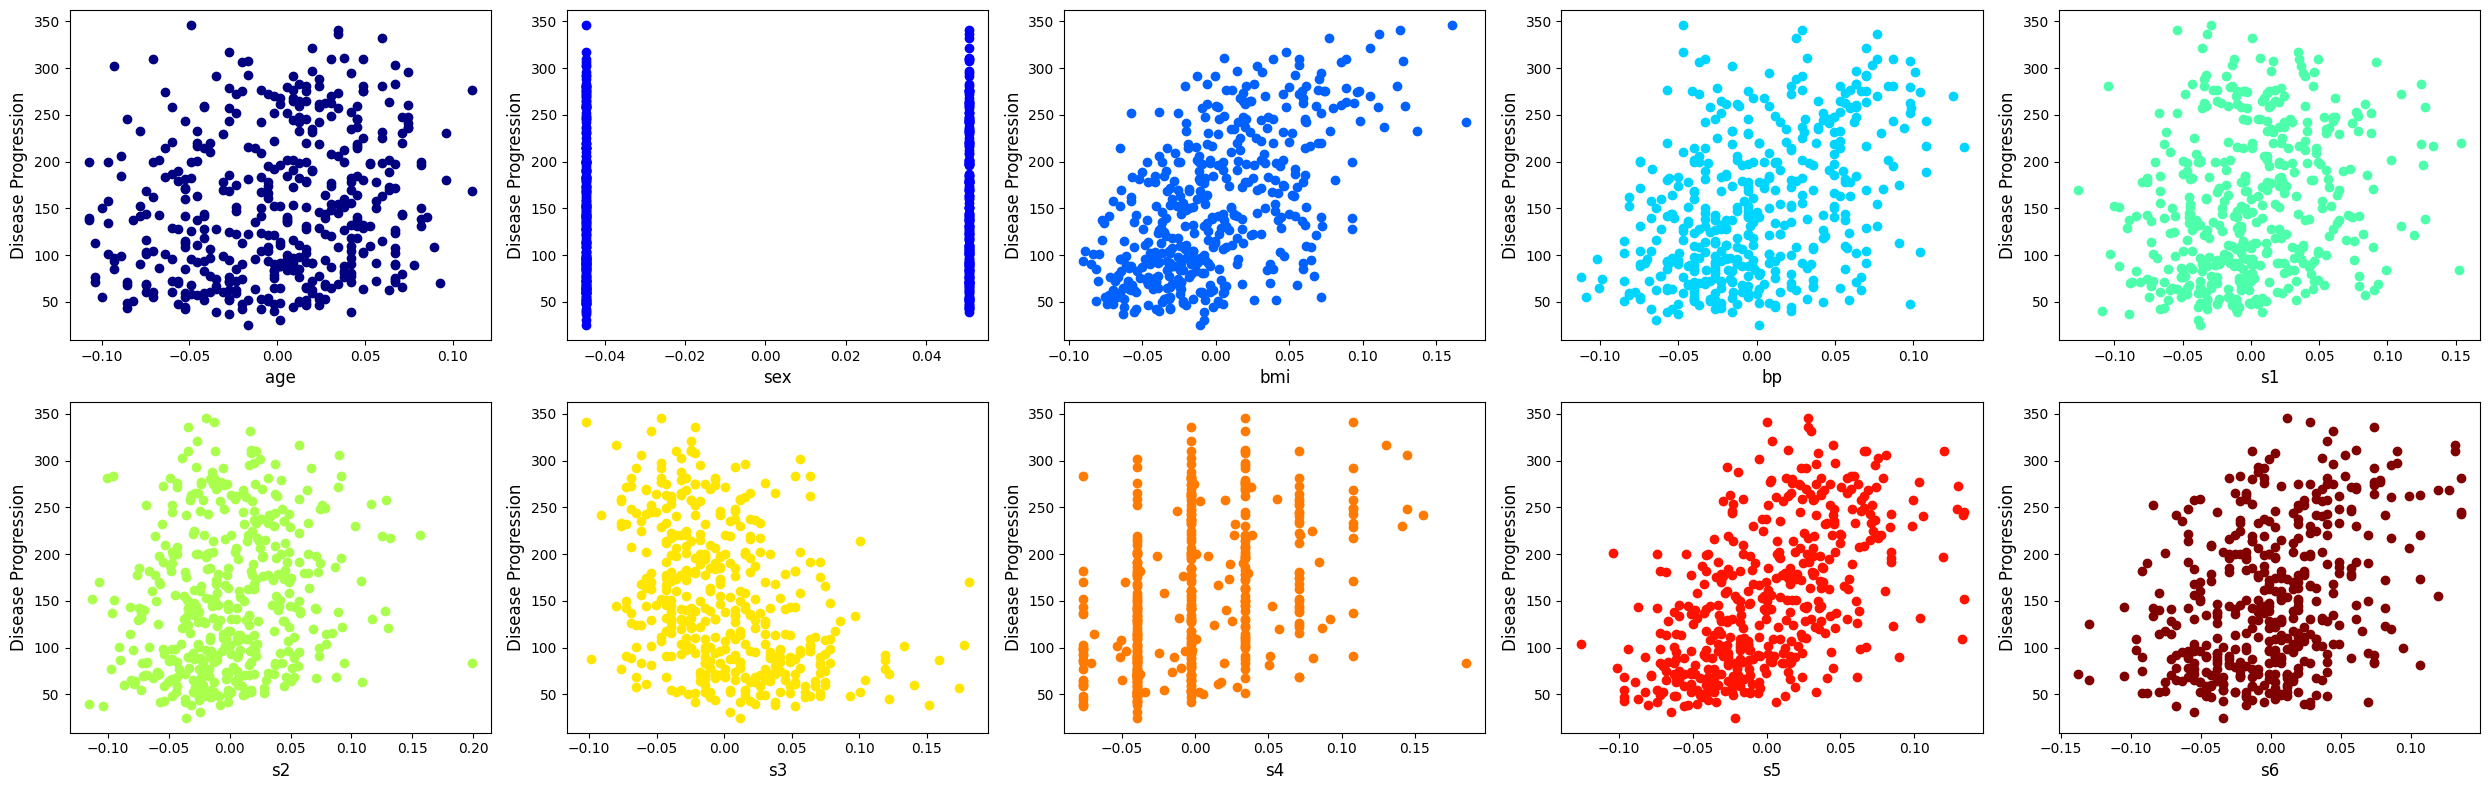

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes = load_diabetes()

# Print data description
print(diabetes['DESCR'])
# Create a DataFrame to store the data and target
diabetes_data = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
diabetes_data["DP"] = diabetes['target']

# Set the size of each individual plot
plot_width = 5
plot_height = 4

# Calculate the number of rows and columns for the grid layout
num_features = len(diabetes.feature_names)
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(plot_width * num_cols, plot_height * num_rows))

# Flatten the axes array to iterate over all the subplots
axes = axes.flatten()

# Define a colormap for assigning different colors to each feature plot
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Plot each feature against the target variable in separate subplots
for index, feature_name in enumerate(diabetes.feature_names):
    axes[index].scatter(diabetes.data[:, index], diabetes.target, color=colors[index])
    axes[index].set_ylabel('Disease Progression', size=12)
    axes[index].set_xlabel(feature_name, size=12)

# Hide any remaining empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Closed-form Solution

The closed-form solution, also known as the normal equation, provides a direct way to calculate the optimal weight vector that minimizes the difference between the predicted values and the actual observations. It can be expressed as:

$
w = (X^T X)^{-1} X^T y
$

Here:
- $w$ is the weight vector containing the optimal coefficients.
- $X$ is the design matrix composed of feature vectors.
- $y$ is the vector of actual response values.

The closed-form solution efficiently calculates the optimal weights by finding the inverse of the product of $X^T$ and $X$, and then multiplying it with $X^T y$. The equation $w = (X^T X)^{-1} X^T y$ arises from the goal of minimizing the MSE error. By taking the derivative of error function with respect to the weight vector $w$ and setting it to zero, we obtain a system of equations that leads to the closed-form solution.

While the closed-form solution is advantageous for smaller datasets and provides a precise solution, it may not be suitable for very large datasets or cases where the matrix $X^T X$ is not invertible (e.g., due to perfect multicollinearity). In such scenarios, gradient descent (GD) or stochastic gradient descent (SGD) approaches are often preferred.

The closed-form solution offers a direct and elegant way to determine the optimal weights for a linear regression model, making it a valuable tool in cases where computational efficiency is not a concern and the dataset size is manageable.

## Task 2 [40 marks]

In this section, we will apply the closed-form solution to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your report:

1. **Implementation of Closed-Form Solution:**
   - Implement a colsed-form solution code to solve the same problem.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and cost (MSE) derived from the Gradient Descent (GD) approach and those acquired through the closed-form solution. Summarise your results in a table (same table for Tasks 2 & 3).

3. **Visualisation of Closed-Form Solution:**
   - Generate a plot that illustrates the line produced by the closed-form solution in relation to the original dataset, as in the GD example.



> **Hint:** To facilitate the process, explore the `numpy.linalg.pinv` function available within the Numpy library. This function offers the capability to compute the (Moore-Penrose) pseudo-inverse of a matrix, which can significantly aid your calculations.



[[152.13348416]
 [949.43526038]]
3890.456585461273


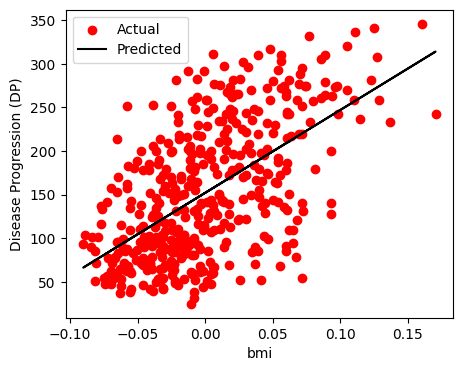

[[152.13348416]
 [714.7382595 ]]
4774.113902368687


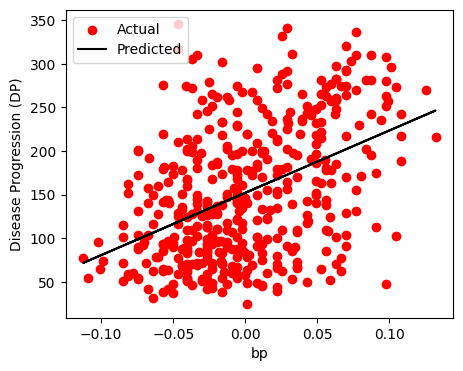

In [83]:

def closedform(X,y):
    lenx = len(X)
    X = np.array([X])

    X = np.vstack((np.array([np.ones(lenx)]),X)).transpose()

    y = np.array([y]).transpose()

    inverse = np.linalg.pinv(np.dot(X.transpose(),X))

    xty = np.dot(X.transpose(),y)

    w_bmi_closedform = np.dot(inverse,xty)
    return w_bmi_closedform

def predict_dp(X,W):
    return np.dot(X,W)
def plot_line(X,W,Y,typ):
    """Plot a line from slope and intercept"""
    X = np.column_stack((np.ones(len(X)),X))
    y_vals = predict_dp(X,W)
    plt.figure(figsize=(5, 4))
    plt.xlabel(typ)
    plt.ylabel('Disease Progression (DP)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()
def cost(X,W,Y):
    X = np.column_stack((np.ones(len(X)),X))
    prediction = predict_dp(X,W)
    return ((Y - prediction.transpose())**2).mean()
# for bmi
X = diabetes_data["bmi"].to_numpy()

y = diabetes_data["DP"].to_numpy()

w = closedform(X,y)
print(w)
c = cost(X,w,y)
print(c)
plot_line(X,w,y,"bmi")

# for bp
X = diabetes_data["bp"].to_numpy()

y = diabetes_data["DP"].to_numpy()

w = closedform(X,y)
print(w)
c = cost(X,w,y)
print(c)
plot_line(X,w,y,"bp")


# Scikit-learn Implementation

If you're looking to apply linear regression to your data using Python, scikit-learn provides a convenient and user-friendly way to do so. First, you'll need to import the necessary module:
```python
from sklearn.linear_model import LinearRegression
```

You can initialise the regressor with various parameters:
> More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Task 3 [15 marks]

In this section, we will use scikit-learn package to address the preceding task while employing the same set of features as previously utilised. The following components are to be included in your report:

1. **Implementation of sckit-learn approach:**
   - Implement a code using sckit-learn to solve the same problems as in tasks 1 & 2.

2. **Comparative Analysis of Weights and MSE:**
   - Perform a comparison between the final weights and MSE derived from the Gradient Descent (GD)  and closed form solution approaches and those acquired through scikit-learn package (include the results in the same table of tasks 1 & 2).

3. **Visualisation of Results:**
   - Generate a plot that illustrates the line produced by scikit-learn package in relation to the original dataset, as in the GD and closed-form examples.

4. **Estimating the Error:**
  - Use the following command from scikit-learn to estimate the MSE error on each case.
  ```python
  from sklearn.metrics import mean_squared_error
  ```

[[949.43526038]]
[152.13348416]


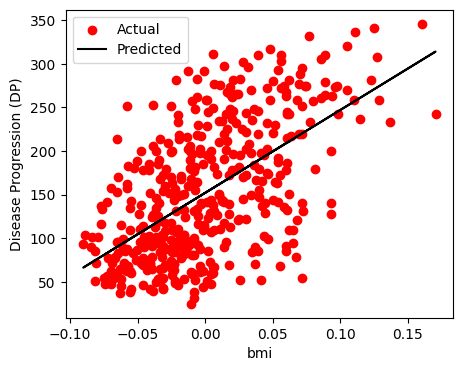

3890.456585461273
[[714.7382595]]
[152.13348416]


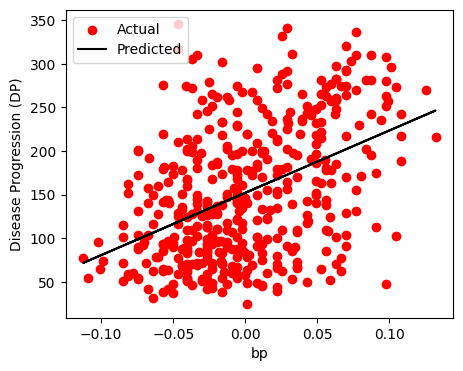

4774.113902368687


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#for bmi
def predict_dp(X,W):
    return np.dot(X,W)
def plot_line(X,W,Y,typ):
    """Plot a line from slope and intercept"""
    X = np.column_stack((np.ones(len(X)),X))
    y_vals = predict_dp(X,W)
    plt.figure(figsize=(5, 4))
    plt.xlabel(typ)
    plt.ylabel('Disease Progression (DP)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()
X =np.array([diabetes_data["bmi"].to_numpy()]).transpose()

y = np.array([diabetes_data["DP"].to_numpy()]).transpose()
reg_bmi = LinearRegression().fit(X, y)
print(reg_bmi.coef_)
print(reg_bmi.intercept_)
W = np.vstack([np.array([reg_bmi.intercept_]),reg_bmi.coef_])
plot_line(X,W,y,"bmi")
print(mean_squared_error(y, reg_bmi.predict(X)))
#for bp
X =np.array([diabetes_data["bp"].to_numpy()]).transpose()

y = np.array([diabetes_data["DP"].to_numpy()]).transpose()
reg_bp = LinearRegression().fit(X, y)
print(reg_bp.coef_)
print(reg_bp.intercept_)
W = np.vstack([np.array([reg_bp.intercept_]),reg_bp.coef_])
plot_line(X,W,y,"bp")
print(mean_squared_error(y, reg_bp.predict(X)))

## Task 4 [10 marks]

Use all the 10 features in the data as inputs to the regressor in order to predict the disease pregression (DP). Compare the results you get (in terms of the MSE and weights of the selected features) to that when you use single variable at a time.



> You are allowed to import the following in this task:
```python
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
```



In [129]:
X = diabetes_data.iloc[:, 0:9].to_numpy()
y = diabetes_data.iloc[:, 10].to_numpy()
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)
print(mean_squared_error(y, reg.predict(X)))

[  -1.9476246  -235.27399685  530.12815657  334.94954815 -797.28289866
  482.30169577  106.8011464   188.77905425  767.00736713]
152.13348416289597
2866.665788680964
